<a href="https://colab.research.google.com/github/MaulidinZakaria/16_MaulidinZakaria/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Praktikum**

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”. Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.    

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png)

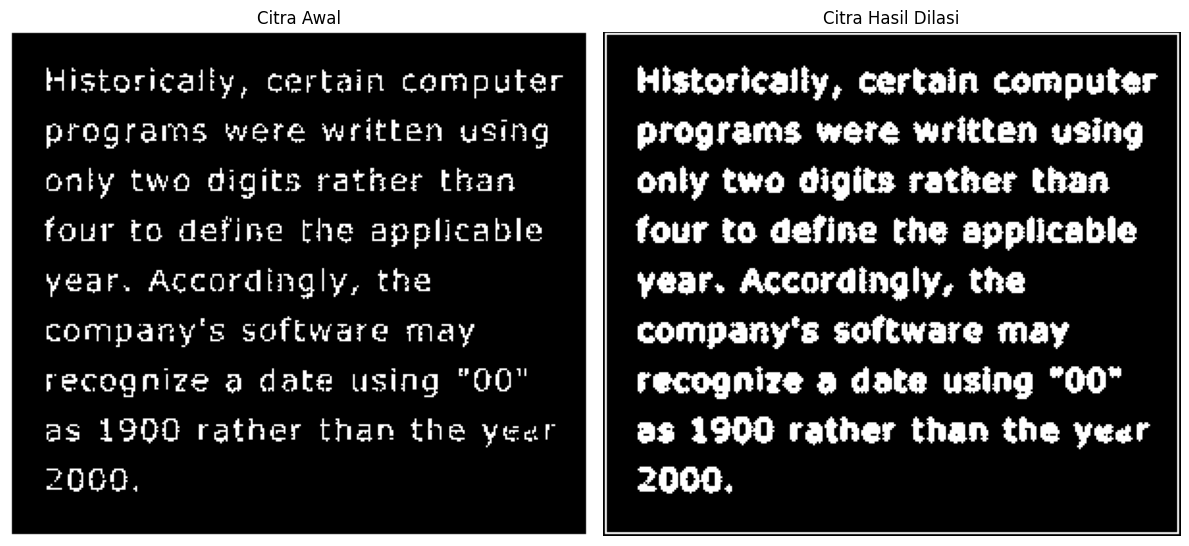

In [5]:
# Fungsi untuk melakukan dilasi dengan structuring element cross 3x3
def dilate_with_cross(img):
    # Ukuran gambar
    h, w = img.shape

    # Salin gambar asli untuk menyimpan hasil
    dilated_img = np.zeros((h, w), dtype=np.uint8)

    # Structuring Element berbentuk cross 3x3
    cross_kernel = np.array([[0, 1, 0],
                             [1, 1, 1],
                             [0, 1, 0]], dtype=np.uint8)

    # Looping melalui setiap piksel dalam gambar (kecuali pinggiran)
    for i in range(1, h-1):
        for j in range(1, w-1):
            # Ambil 3x3 window sekitar piksel saat ini
            window = img[i-1:i+2, j-1:j+2]

            # Jika salah satu piksel dalam cross kernel adalah 1, dilasi piksel target
            if np.any(window[cross_kernel == 1]):
                dilated_img[i, j] = 255  # Set ke 255 (putih)

    return dilated_img

# Baca gambar 'morphology.png'
img = cv.imread('/content/drive/MyDrive/Images/morphology.png', cv.IMREAD_GRAYSCALE)

# Threshold untuk membuat gambar biner (jika gambar tidak biner)
_, binary_img = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# Terapkan dilasi dengan cross 3x3
dilated_img = dilate_with_cross(binary_img)

# Tampilkan hasil
plt.figure(figsize=(12, 6))

# Tampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

# Tampilkan hasil dilasi
plt.subplot(1, 2, 2)
plt.imshow(dilated_img, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

plt.tight_layout()
plt.show()


4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png, dan cetak Structuring Element-nya)

Structuring Element (Cross 3x3):
 [[0 1 0]
 [1 1 1]
 [0 1 0]]


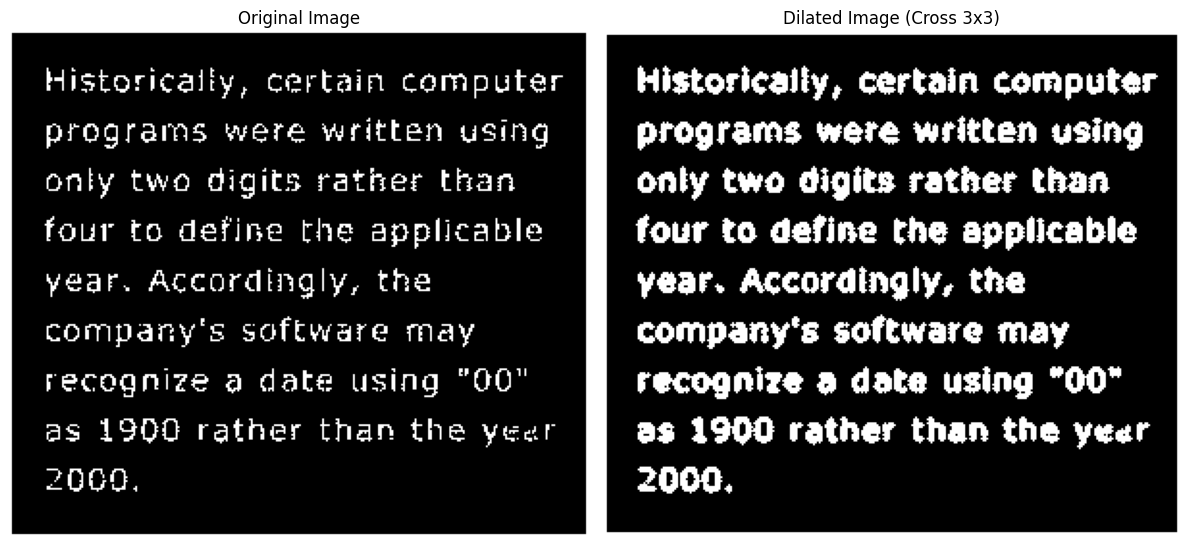

In [6]:
# Baca gambar dalam grayscale
img = cv.imread('/content/drive/MyDrive/Images/morphology.png', cv.IMREAD_GRAYSCALE)

# Threshold untuk membuat gambar biner (jika gambar tidak biner)
_, binary_img = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# Buat structuring element berbentuk cross 3x3
cross_kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))

# Cetak Structuring Element (cross)
print("Structuring Element (Cross 3x3):\n", cross_kernel)

# Terapkan operasi dilasi menggunakan structuring element cross
dilated_img = cv.dilate(binary_img, cross_kernel, iterations=1)

# Tampilkan hasil
plt.figure(figsize=(12, 6))

# Tampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Tampilkan hasil dilasi
plt.subplot(1, 2, 2)
plt.imshow(dilated_img, cmap='gray')
plt.title('Dilated Image (Cross 3x3)')
plt.axis('off')

plt.tight_layout()
plt.show()


5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
j.png)

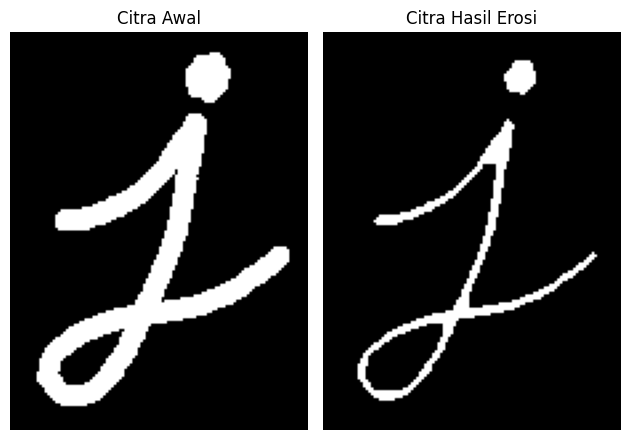

In [7]:
def erosion(img, kernel):
  # Mengambil variabel height dan width
  height, width = img.shape
  kernel_height, kernel_width = kernel.shape

  # Menghitung padding kernel untuk memastikan kernel diterapkan pada batas tepi img
  pad_h = kernel_height // 2
  pad_w = kernel_width // 2

  # Inisialisasi bidang gambar baru
  result = np.zeros_like(img)

  for i in range(pad_h, height - pad_h):
    for j in range(pad_w, width - pad_w):
      # Mengambil region/area untuk dilakukan proses dilasi
      region = img[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]

      # Untuk melakukan pengecekan apakah semua elemen kernel dan region bernilai 1
      result[i, j] = np.min(region[kernel == 1])

  return result

# Membaca gambar
image = cv.imread('/content/drive/MyDrive/Images/j.png', cv.IMREAD_GRAYSCALE)

# Membuat kernel 5x5
kernel = np.ones((5, 5), np.uint8)

# Melakukan erosi
eroded_image = erosion(image, kernel)

# Tampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

# Tampilkan hasil erosi
plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.tight_layout()
plt.show()


6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

Structuring Element (Square 5x5):
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


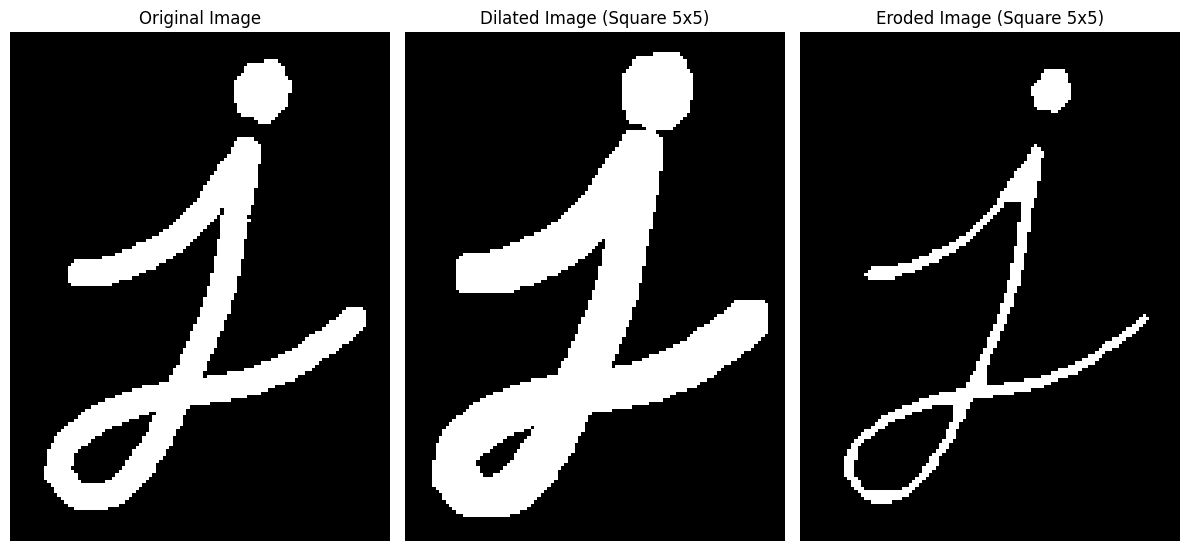

In [8]:
# Membaca gambar 'j.png' dalam grayscale
img = cv.imread('/content/drive/MyDrive/Images/j.png', cv.IMREAD_GRAYSCALE)

# Threshold untuk membuat gambar biner
_, binary_img = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# Membuat Structuring Element berbentuk square 5x5
se_square = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))

# Cetak Structuring Element (square)
print("Structuring Element (Square 5x5):\n", se_square)

# Lakukan operasi dilasi menggunakan library OpenCV
dilated_img = cv.dilate(binary_img, se_square, iterations=1)
eroded_img = cv.erode(binary_img, se_square, iterations=1)

# Tampilkan hasil
plt.figure(figsize=(12, 6))

# Tampilkan gambar asli
plt.subplot(1, 3, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Tampilkan hasil dilasi
plt.subplot(1, 3, 2)
plt.imshow(dilated_img, cmap='gray')
plt.title('Dilated Image (Square 5x5)')
plt.axis('off')

# Tampilkan hasil dilasi
plt.subplot(1, 3, 3)
plt.imshow(eroded_img, cmap='gray')
plt.title('Eroded Image (Square 5x5)')
plt.axis('off')

plt.tight_layout()
plt.show()

7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

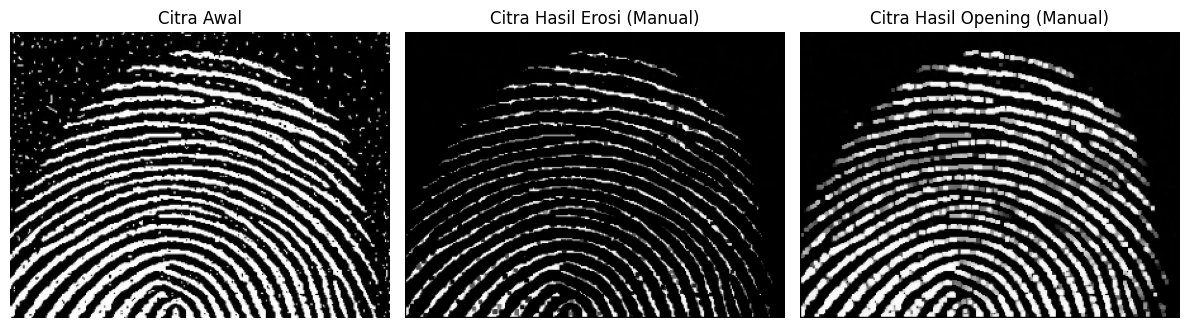

In [9]:
def dilation(img, kernel):
  # Mengambil variabel height dan width
  height, width = img.shape
  kernel_height, kernel_width = kernel.shape

  # Menghitung padding kernel untuk memastikan kernel diterapkan pada batas tepi img
  pad_h = kernel_height // 2
  pad_w = kernel_width // 2

  # Inisialisasi bidang gambar baru
  result = np.zeros_like(img)

  for i in range(pad_h, height - pad_h):
    for j in range(pad_w, width - pad_w):
      # Mengambil region/area untuk dilakukan proses dilasi
      region = img[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]

      # Melakukan perhitungan dilasi dengan menyesuaikan region dan kernel
      result[i, j] = np.max(region * kernel)

  return result

# Membaca gambar
image = cv.imread('/content/drive/MyDrive/Images/fingerprint.png', cv.IMREAD_GRAYSCALE)

# Membuat kernel 3x3
kernel = np.ones((3, 3), np.uint8)

# Melakukan operasi opening secara manual
# 1. Erosi terlebih dahulu
eroded_image = erosion(image, kernel)
# 2. Dilasi dari hasil erosi
opened_image_manual = dilation(eroded_image, kernel)

# Menampilkan hasil
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi (Manual)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(opened_image_manual, cmap='gray')
plt.title('Citra Hasil Opening (Manual)')
plt.axis('off')

plt.tight_layout()
plt.show()


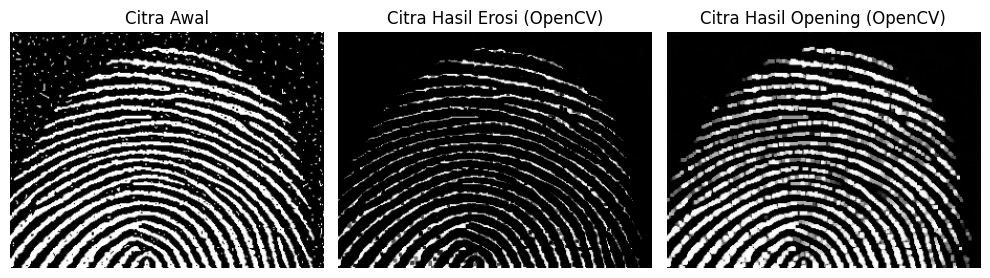

In [10]:
# Membaca gambar
image = cv.imread('/content/drive/MyDrive/Images/fingerprint.png', cv.IMREAD_GRAYSCALE)

# Membuat kernel 3x3
kernel = np.ones((3, 3), np.uint8)

# Melakukan erosi menggunakan OpenCV
eroded_image = cv.erode(image, kernel, iterations=1)

# Melakukan operasi opening menggunakan OpenCV
opened_image_opencv = cv.morphologyEx(image, cv.MORPH_OPEN, kernel)

# Menampilkan hasil
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi (OpenCV)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(opened_image_opencv, cmap='gray')
plt.title('Citra Hasil Opening (OpenCV)')
plt.axis('off')

plt.tight_layout()
plt.show()


8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

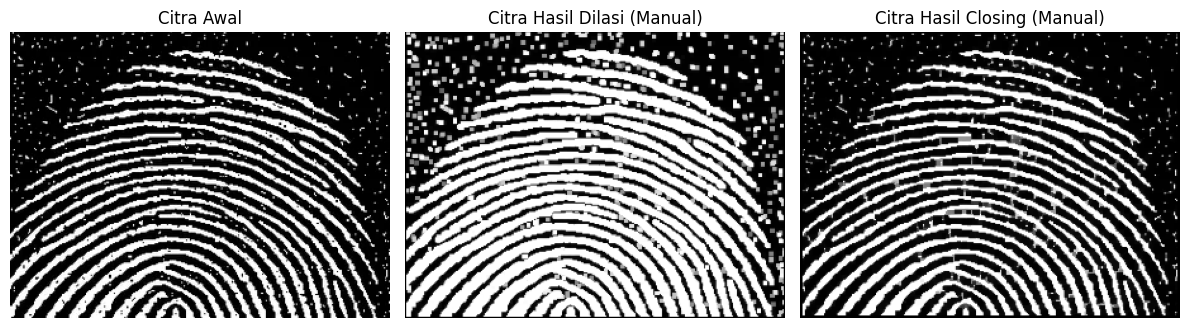

In [11]:
# Membaca gambar
image = cv.imread('/content/drive/MyDrive/Images/fingerprint.png', cv.IMREAD_GRAYSCALE)

# Membuat kernel 3x3
kernel = np.ones((3, 3), np.uint8)

# Melakukan operasi closing secara manual
# 1. Dilation terlebih dahulu
dilated_image = dilation(image, kernel)
# 2. Erosi dari hasil dilasi
closed_image_manual = erosion(dilated_image, kernel)

# Menampilkan hasil
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi (Manual)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(closed_image_manual, cmap='gray')
plt.title('Citra Hasil Closing (Manual)')
plt.axis('off')

plt.tight_layout()
plt.show()


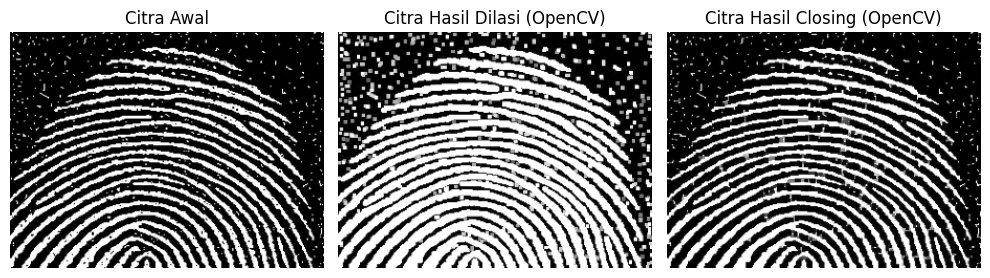

In [12]:
# Membaca gambar
image = cv.imread('/content/drive/MyDrive/Images/fingerprint.png', cv.IMREAD_GRAYSCALE)

# Membuat kernel 3x3
kernel = np.ones((3, 3), np.uint8)

# Melakukan erosi menggunakan OpenCV
dilated_image = cv.dilate(image, kernel, iterations=1)

# Melakukan operasi opening menggunakan OpenCV
closing_image_opencv = cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)

# Menampilkan hasil
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi (OpenCV)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(closing_image_opencv, cmap='gray')
plt.title('Citra Hasil Closing (OpenCV)')
plt.axis('off')

plt.tight_layout()
plt.show()


9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3  dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

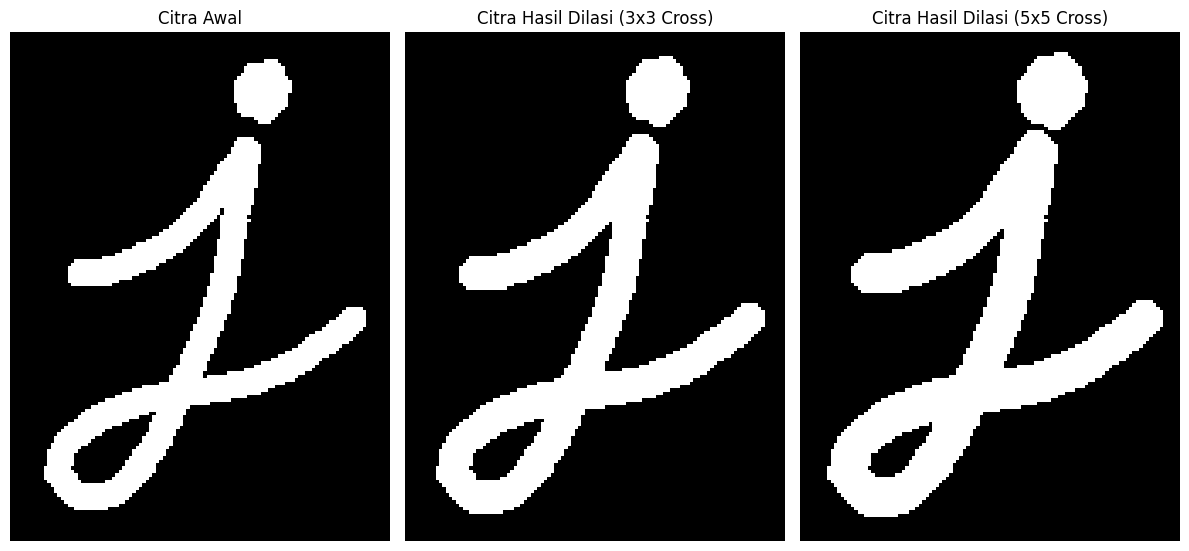

In [13]:
def create_cross_kernel(size):
    """Create a cross-shaped structuring element."""
    kernel = np.zeros((size, size), dtype=np.uint8)
    center = size // 2
    kernel[center, :] = 1  # Horizontal line
    kernel[:, center] = 1  # Vertical line
    return kernel

# Membaca gambar
image = cv.imread('/content/drive/MyDrive/Images/j.png', cv.IMREAD_GRAYSCALE)

# Membuat kernel cross 3x3 dan 5x5
kernel_3x3 = create_cross_kernel(3)
kernel_5x5 = create_cross_kernel(5)

# Melakukan operasi dilasi menggunakan OpenCV
dilated_image_3x3 = cv.dilate(image, kernel_3x3)
dilated_image_5x5 = cv.dilate(image, kernel_5x5)

# Menampilkan hasil
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(dilated_image_3x3, cmap='gray')
plt.title('Citra Hasil Dilasi (3x3 Cross)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dilated_image_5x5, cmap='gray')
plt.title('Citra Hasil Dilasi (5x5 Cross)')
plt.axis('off')

plt.tight_layout()
plt.show()


10.  Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3  dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

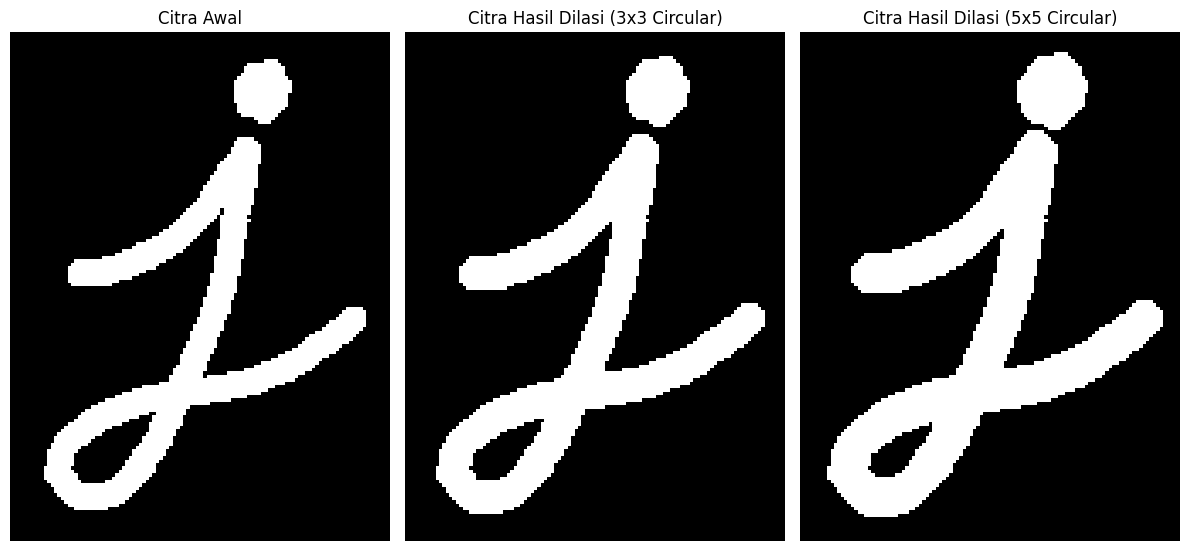

In [14]:
def create_circular_kernel(size):
    """Create a circular-shaped structuring element."""
    radius = size // 2
    kernel = np.zeros((size, size), dtype=np.uint8)

    for i in range(size):
        for j in range(size):
            if (i - radius) ** 2 + (j - radius) ** 2 <= radius ** 2:
                kernel[i, j] = 1
    return kernel

# Membaca gambar
image = cv.imread('/content/drive/MyDrive/Images/j.png', cv.IMREAD_GRAYSCALE)

# Membuat kernel circular 3x3 dan 5x5
kernel_3x3 = create_circular_kernel(3)
kernel_5x5 = create_circular_kernel(5)

# Melakukan operasi dilasi menggunakan OpenCV
dilated_image_3x3 = cv.dilate(image, kernel_3x3)
dilated_image_5x5 = cv.dilate(image, kernel_5x5)

# Menampilkan hasil
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(dilated_image_3x3, cmap='gray')
plt.title('Citra Hasil Dilasi (3x3 Circular)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dilated_image_5x5, cmap='gray')
plt.title('Citra Hasil Dilasi (5x5 Circular)')
plt.axis('off')

plt.tight_layout()
plt.show()


11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5  dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

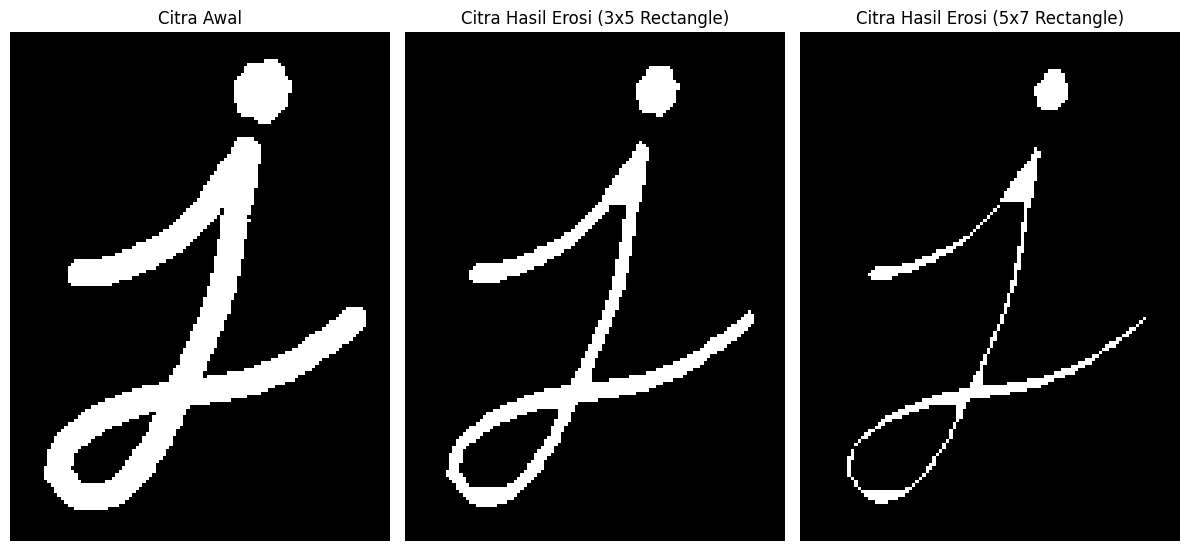

In [15]:
# Membaca gambar
image = cv.imread('/content/drive/MyDrive/Images/j.png', cv.IMREAD_GRAYSCALE)

# Membuat kernel rectangle 3x5 dan 5x7
kernel_3x5 = cv.getStructuringElement(cv.MORPH_RECT, (5, 3))  # Lebar 5, Tinggi 3
kernel_5x7 = cv.getStructuringElement(cv.MORPH_RECT, (7, 5))  # Lebar 7, Tinggi 5

# Melakukan operasi erosi menggunakan OpenCV
eroded_image_3x5 = cv.erode(image, kernel_3x5)
eroded_image_5x7 = cv.erode(image, kernel_5x7)

# Menampilkan hasil
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(eroded_image_3x5, cmap='gray')
plt.title('Citra Hasil Erosi (3x5 Rectangle)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(eroded_image_5x7, cmap='gray')
plt.title('Citra Hasil Erosi (5x7 Rectangle)')
plt.axis('off')

plt.tight_layout()
plt.show()


12.  Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)  

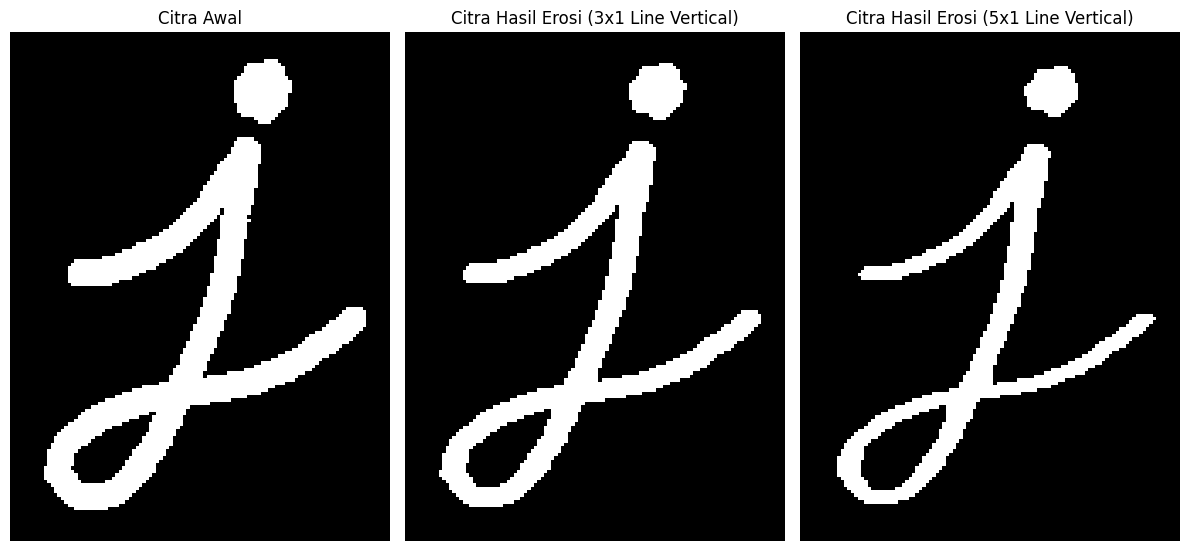

In [16]:
# Membaca gambar
image = cv.imread('/content/drive/MyDrive/Images/j.png', cv.IMREAD_GRAYSCALE)

# Membuat kernel line vertikal 3x1 dan 5x1
kernel_vertical_3 = cv.getStructuringElement(cv.MORPH_CROSS, (1, 3))  # 1 kolom, 3 baris
kernel_vertical_5 = cv.getStructuringElement(cv.MORPH_CROSS, (1, 5))  # 1 kolom, 5 baris

# Melakukan operasi erosi menggunakan OpenCV
eroded_image_vertical_3 = cv.erode(image, kernel_vertical_3)
eroded_image_vertical_5 = cv.erode(image, kernel_vertical_5)

# Menampilkan hasil
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(eroded_image_vertical_3, cmap='gray')
plt.title('Citra Hasil Erosi (3x1 Line Vertical)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(eroded_image_vertical_5, cmap='gray')
plt.title('Citra Hasil Erosi (5x1 Line Vertical)')
plt.axis('off')

plt.tight_layout()
plt.show()


# **Tugas Kelompok**

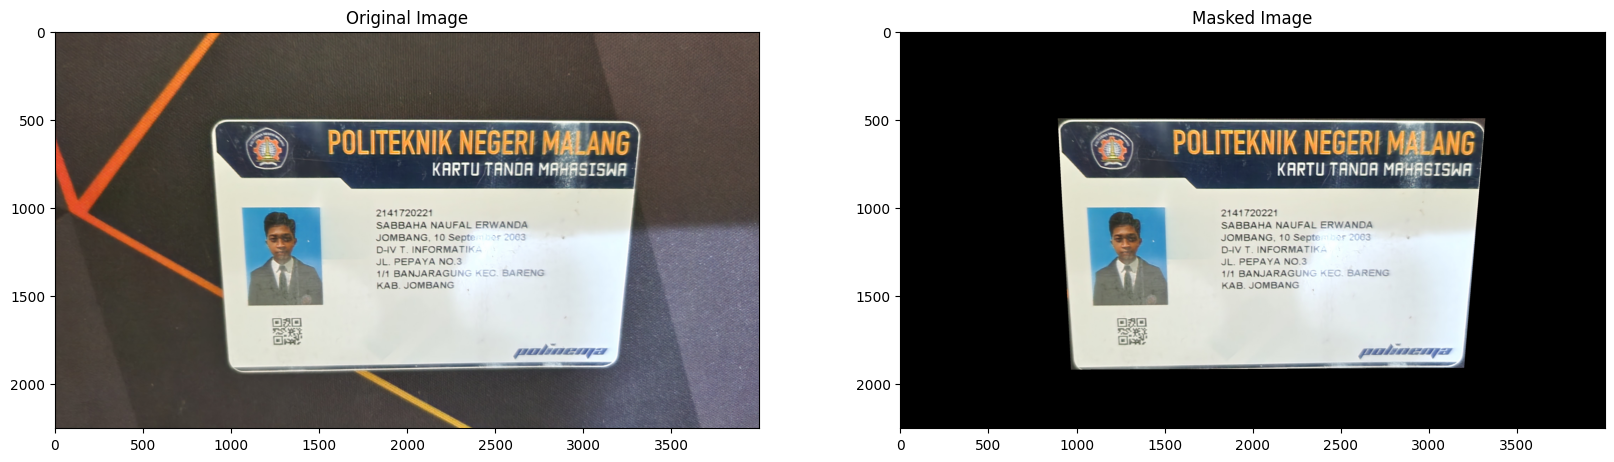

In [17]:
# Load image (KTM image)
img_path = '/content/drive/MyDrive/Images/KTM/3A_2141720221_4 - Sabbaha Naufal.jpg'  # Sesuaikan dengan path gambar
img = cv.imread(img_path)

# Konversi ke RGB
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Buat mask dengan ukuran yang sama dengan gambar
mask = np.zeros(img.shape, dtype=np.uint8)

points = np.array([[895,495],[3320,495],[3200,1910],[970,1920]], dtype=np.int32)
pts = points.reshape((-1, 1, 2))
cv.fillPoly(mask, [pts], color=(255,255,255))

# Terapkan mask pada gambar
masked_img = cv.bitwise_and(img_rgb, mask)

plt.figure(figsize=(20, 10))

# Tampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
# plt.axis("off")  # Mematikan sumbu

# Tampilkan gambar dengan mask
plt.subplot(1, 2, 2)
plt.imshow(masked_img)
plt.title("Masked Image")
# plt.axis("off")  # Mematikan sumbu

# Tampilkan semua gambar dalam satu figure
plt.show()


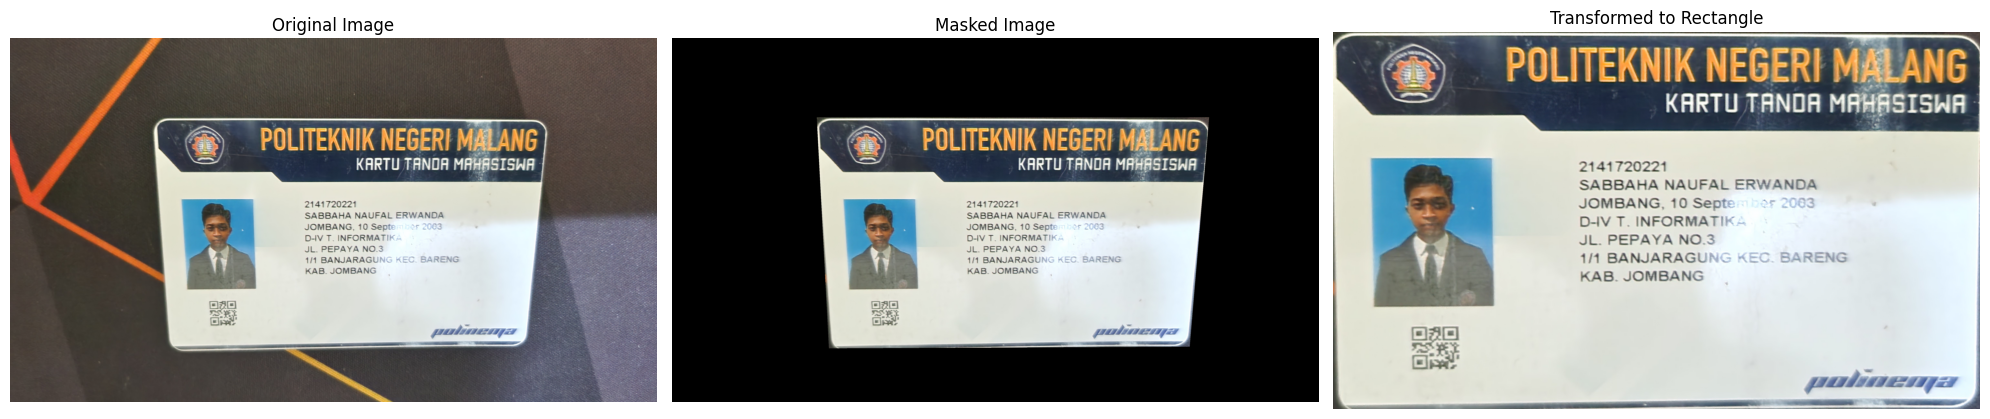

In [18]:
trapezium_points = np.array([[895, 495], [3320, 495], [3200, 1910], [970, 1920]], dtype=np.float32)

# Koordinat titik tujuan (persegi panjang dengan ukuran yang Anda inginkan)
rect_width = 2400  # Lebar yang diinginkan untuk persegi panjang hasil transformasi
rect_height = 1400  # Tinggi yang diinginkan
rect_points = np.array([[0, 0], [rect_width, 0], [rect_width, rect_height], [0, rect_height]], dtype=np.float32)

# Mendapatkan matriks transformasi perspektif
matrix = cv.getPerspectiveTransform(trapezium_points, rect_points)

# Menerapkan transformasi perspektif
warped_img = cv.warpPerspective(img_rgb, matrix, (rect_width, rect_height))

# Plotting
plt.figure(figsize=(20, 10))

# Tampilkan gambar asli
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

# Tampilkan gambar dengan mask
plt.subplot(1, 3, 2)
plt.imshow(masked_img)
plt.title("Masked Image")
plt.axis("off")

# Tampilkan gambar setelah transformasi perspektif
plt.subplot(1, 3, 3)
plt.imshow(warped_img)
plt.title("Transformed to Rectangle")
plt.axis("off")

plt.tight_layout()
plt.show()

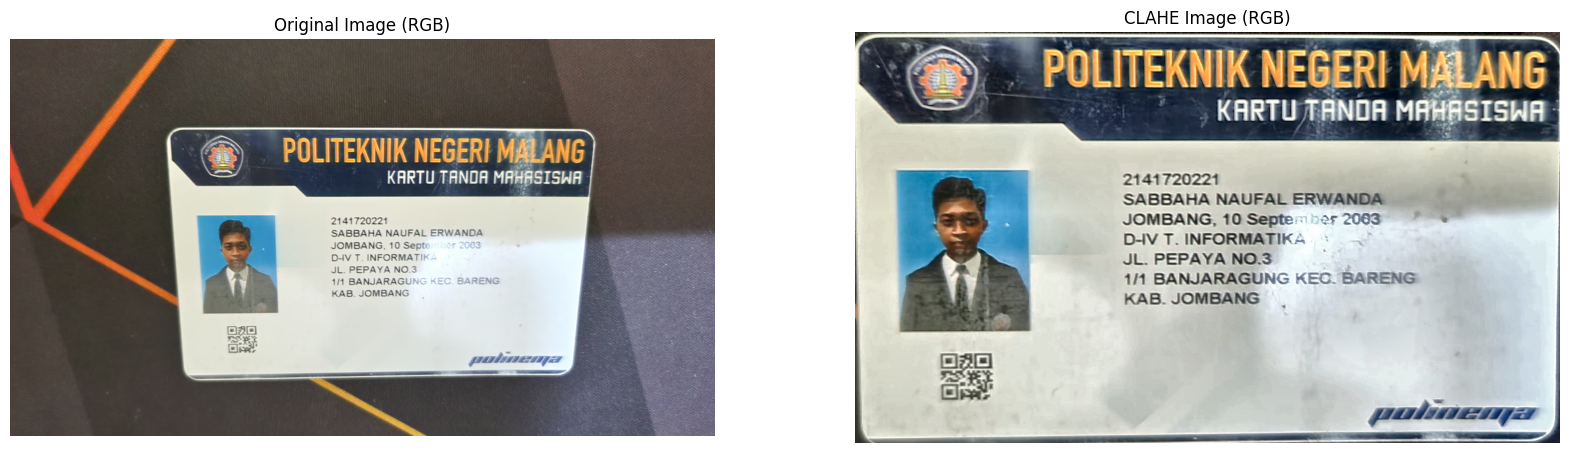

In [19]:
# 3. CLAHE Histogram Equalization (RGB)

# Konversi gambar ke ruang warna LAB
denoised_img = cv.GaussianBlur(warped_img, (5, 5), 0)
lab_img = cv.cvtColor(denoised_img, cv.COLOR_RGB2LAB)

# Pisahkan channel L, A, dan B
l_channel, a_channel, b_channel = cv.split(lab_img)

# Terapkan CLAHE hanya pada L channel (luminance)
clahe = cv.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
l_channel_clahe = clahe.apply(l_channel)

# Gabungkan kembali channel L yang telah di-enhance dengan CLAHE dengan channel A dan B yang asli
lab_clahe_img = cv.merge((l_channel_clahe, a_channel, b_channel))

# Konversi kembali ke RGB dari LAB
rgb_clahe_img = cv.cvtColor(lab_clahe_img, cv.COLOR_LAB2RGB)

sharpening_kernel = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

rgb_clahe_img = cv.filter2D(rgb_clahe_img, -1, sharpening_kernel)

# Plot gambar asli dan hasil CLAHE (RGB)
plt.figure(figsize=(20, 10))

# Tampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image (RGB)")
plt.axis("off")

# Tampilkan gambar hasil CLAHE di ruang warna RGB
plt.subplot(1, 2, 2)
plt.imshow(rgb_clahe_img)
plt.title("CLAHE Image (RGB)")
plt.axis("off")

# Tampilkan semua gambar dalam satu figure
plt.show()

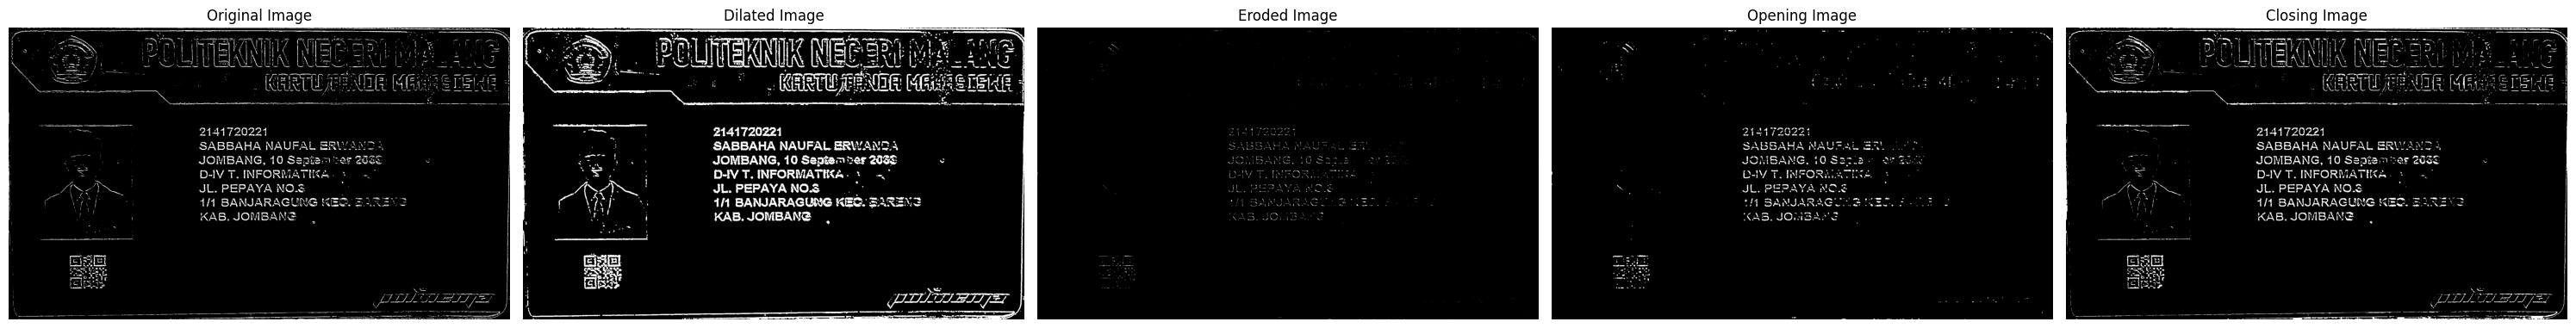

In [39]:
gray_image = cv.cvtColor(rgb_clahe_img, cv.COLOR_RGB2GRAY)

# Filter median untuk mengurangi noise kecil sebelum thresholding
gray_image = cv.medianBlur(gray_image, 5)

# Threshold untuk membuat gambar biner
binary_img = cv.adaptiveThreshold(gray_image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, blockSize=11, C=10)

# Membuat Structuring Element berbentuk square
se = cv.getStructuringElement(cv.MORPH_CROSS, (5,5))

# Lakukan operasi dilasi menggunakan library OpenCV
dilated_img = cv.dilate(binary_img, se, iterations=1)
eroded_img = cv.erode(binary_img, se, iterations=1)
opened_img = cv.morphologyEx(binary_img, cv.MORPH_OPEN, se)
closed_img = cv.morphologyEx(binary_img, cv.MORPH_CLOSE, se)

# Tampilkan hasil
plt.figure(figsize=(30, 15))

# Tampilkan gambar asli
plt.subplot(1, 5, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Tampilkan hasil dilasi
plt.subplot(1, 5, 2)
plt.imshow(dilated_img, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

# Tampilkan hasil dilasi
plt.subplot(1, 5, 3)
plt.imshow(eroded_img, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

# Tampilkan hasil dilasi
plt.subplot(1, 5, 4)
plt.imshow(opened_img, cmap='gray')
plt.title('Opening Image')
plt.axis('off')

# Tampilkan hasil dilasi
plt.subplot(1, 5, 5)
plt.imshow(closed_img, cmap='gray')
plt.title('Closing Image')
plt.axis('off')

plt.tight_layout()
plt.show()

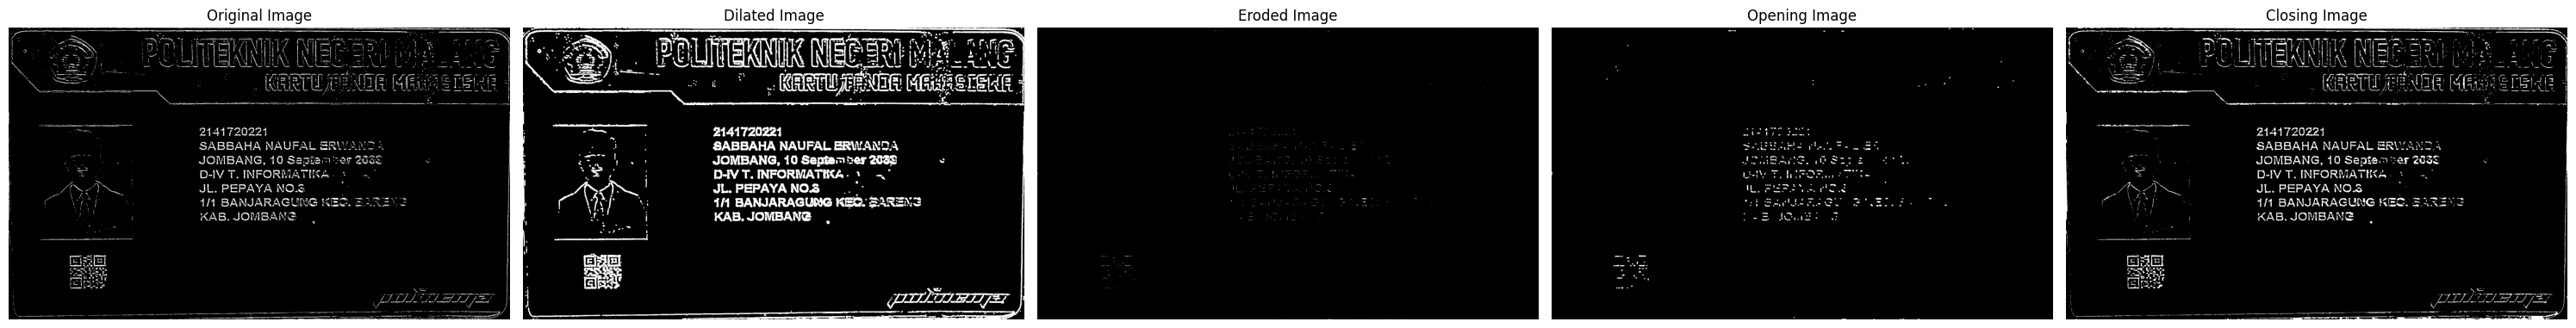

In [40]:
gray_image = cv.cvtColor(rgb_clahe_img, cv.COLOR_RGB2GRAY)

# Filter median untuk mengurangi noise kecil sebelum thresholding
gray_image = cv.medianBlur(gray_image, 5)

# Threshold untuk membuat gambar biner
binary_img = cv.adaptiveThreshold(gray_image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, blockSize=11, C=10)

# Membuat Structuring Element berbentuk square
se = cv.getStructuringElement(cv.MORPH_RECT, (5,5))

# Lakukan operasi dilasi menggunakan library OpenCV
dilated_img = cv.dilate(binary_img, se, iterations=1)
eroded_img = cv.erode(binary_img, se, iterations=1)
opened_img = cv.morphologyEx(binary_img, cv.MORPH_OPEN, se)
closed_img = cv.morphologyEx(binary_img, cv.MORPH_CLOSE, se)

# Tampilkan hasil
plt.figure(figsize=(30, 15))

# Tampilkan gambar asli
plt.subplot(1, 5, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Tampilkan hasil dilasi
plt.subplot(1, 5, 2)
plt.imshow(dilated_img, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

# Tampilkan hasil dilasi
plt.subplot(1, 5, 3)
plt.imshow(eroded_img, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

# Tampilkan hasil dilasi
plt.subplot(1, 5, 4)
plt.imshow(opened_img, cmap='gray')
plt.title('Opening Image')
plt.axis('off')

# Tampilkan hasil dilasi
plt.subplot(1, 5, 5)
plt.imshow(closed_img, cmap='gray')
plt.title('Closing Image')
plt.axis('off')

plt.tight_layout()
plt.show()

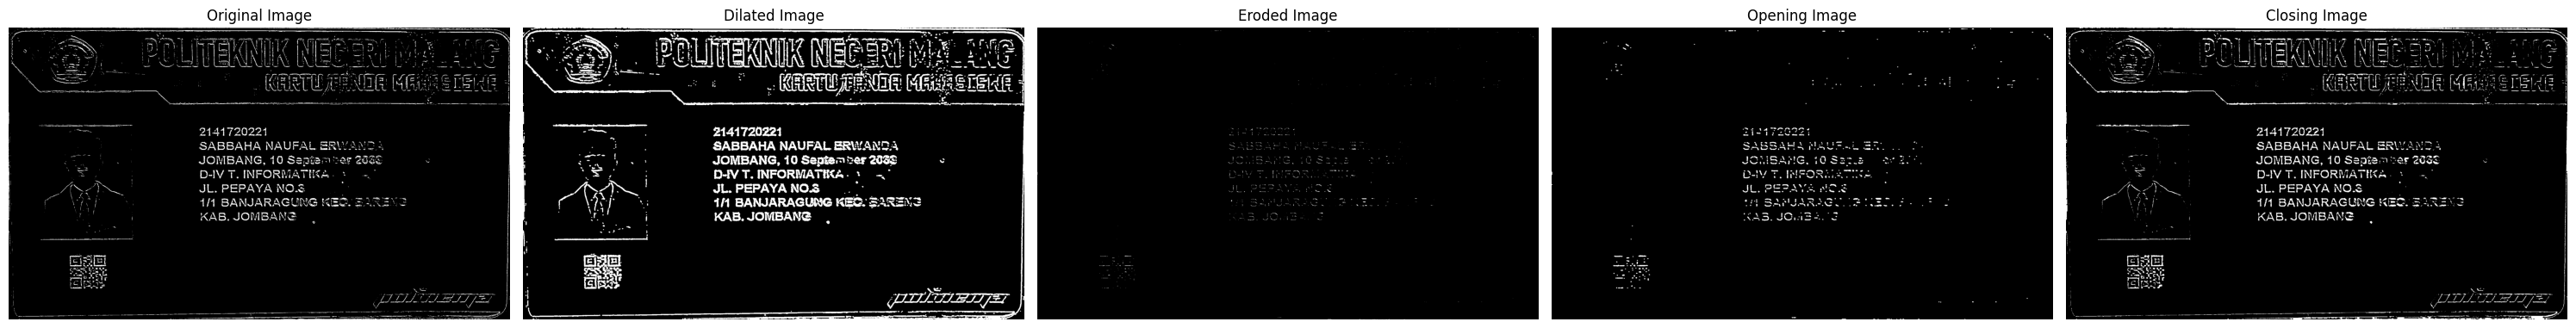

In [41]:
gray_image = cv.cvtColor(rgb_clahe_img, cv.COLOR_RGB2GRAY)

# Filter median untuk mengurangi noise kecil sebelum thresholding
gray_image = cv.medianBlur(gray_image, 5)

# Threshold untuk membuat gambar biner
binary_img = cv.adaptiveThreshold(gray_image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, blockSize=11, C=10)

# Membuat Structuring Element berbentuk square
se = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))

# Lakukan operasi dilasi menggunakan library OpenCV
dilated_img = cv.dilate(binary_img, se, iterations=1)
eroded_img = cv.erode(binary_img, se, iterations=1)
opened_img = cv.morphologyEx(binary_img, cv.MORPH_OPEN, se)
closed_img = cv.morphologyEx(binary_img, cv.MORPH_CLOSE, se)

# Tampilkan hasil
plt.figure(figsize=(30, 15))

# Tampilkan gambar asli
plt.subplot(1, 5, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Tampilkan hasil dilasi
plt.subplot(1, 5, 2)
plt.imshow(dilated_img, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

# Tampilkan hasil dilasi
plt.subplot(1, 5, 3)
plt.imshow(eroded_img, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

# Tampilkan hasil dilasi
plt.subplot(1, 5, 4)
plt.imshow(opened_img, cmap='gray')
plt.title('Opening Image')
plt.axis('off')

# Tampilkan hasil dilasi
plt.subplot(1, 5, 5)
plt.imshow(closed_img, cmap='gray')
plt.title('Closing Image')
plt.axis('off')

plt.tight_layout()
plt.show()